# **아이스크림(계절과 판매량) | 회귀분석**

## 1. 라이브러리 설치

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

## 2. Data

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()   ## 자료를 크기 순서대로 정렬

In [3]:
temp

array([-4.1, -3.7, -3. , -1.3, -0.5, -0.3,  0.3,  0.4,  0.4,  0.7,  0.7,
        0.9,  0.9,  1. ,  1.2,  1.4,  1.4,  1.5,  1.5,  2. ,  2. ,  2. ,
        2.3,  2.5,  2.5,  2.5,  2.6,  2.6,  2.9,  3.2,  3.5,  3.5,  3.6,
        3.7,  3.8,  4.2,  4.4,  4.5,  4.5,  4.6,  4.9,  4.9,  4.9,  5. ,
        5. ,  5.1,  5.6,  5.9,  5.9,  6. ,  6. ,  6.1,  6.1,  6.3,  6.3,
        6.4,  6.4,  6.5,  6.7,  6.8,  6.8,  7. ,  7. ,  7.1,  7.2,  7.4,
        7.7,  8. ,  8.1,  8.1,  8.3,  8.4,  8.4,  8.4,  8.5,  8.8,  8.9,
        9.1,  9.2,  9.3,  9.4,  9.4,  9.5,  9.6,  9.6,  9.7,  9.8,  9.9,
       10.2, 10.3, 10.6, 10.6, 10.8, 11.2, 12.1, 12.4, 13.4, 14.7, 15. ,
       15.2])

> 전주시의 기온 100개 자료를 가져왔다.

In [4]:
#동일한 코드
#temp = np.array(pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3])
#temp.sort()

```-``` 아래와 같은 모형을 가정하자.

$$\textup{아이스크림 판매량}= 20 ＋ \textup{온도} × 2.5 × \textup{오차(운)}$$

* 더미 모형 생성

In [5]:
np.random.seed(43052)
eps = np.random.randn(100)*3  ## 오차
icecream_sales = 20 + temp * 2.5 + eps

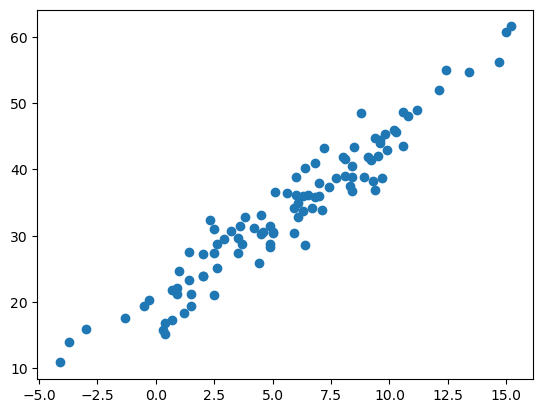

In [6]:
plt.plot(temp, icecream_sales, "o")

* 우리는 아래를 관측했다고 생각하자.

In [7]:
df = pd.DataFrame({'temp' : temp, 'sales' : icecream_sales})
df

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
95,12.4,54.926065
96,13.4,54.716129
97,14.7,56.194791
98,15.0,60.666163


## 3. 게임셋팅

\- 주어진 자료는 아래와 같다.

In [8]:
df

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
95,12.4,54.926065
96,13.4,54.716129
97,14.7,56.194791
98,15.0,60.666163


\- 편의상 아래와 같은 기호를 도입하자.

-   (`df.temp[0]`, `df.temp[1]`, … , `df.temp[99]`) =
    $(x_1,x_2,\dots,x_{100})=(-4.1,-3.7,\dots,15.2)$
-   (`df.sales[0]`, `df.sales[1]`, … , `df.sales[99]`) =
    $(y_1,y_2,\dots,y_{100})=(10.90,14.00, \dots,61.56)$

> 이 자료 $\big\{(x_i,y_i)\big\}_{i=1}^{100}$를 바탕으로 어떠한 **패턴**을 발견하여 새로운 $x$에 대한 예측값을 알고 싶다 : $\hat{y}$

### **A. 질문**

\- 기온이 $x = -2.0$일 때 아이스크림을 얼마정도 판다고 보는 게 타당할까?

### **B. 답1**

\- $x = -2.0$ 근처의 데이터를 살펴보자.

In [9]:
df[(-4.0 < df.temp) & (0.0 > df.temp)]

,temp,sales
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
5,-0.3,20.317853


> $-1.3$이 제일 가까운데, 대충 $x = -2.0$이라면 17.67근처이지 않을까...?

### **답2 | 그림을 보고 답변**

\- 자료를 바탕으로 그림을 그려보자

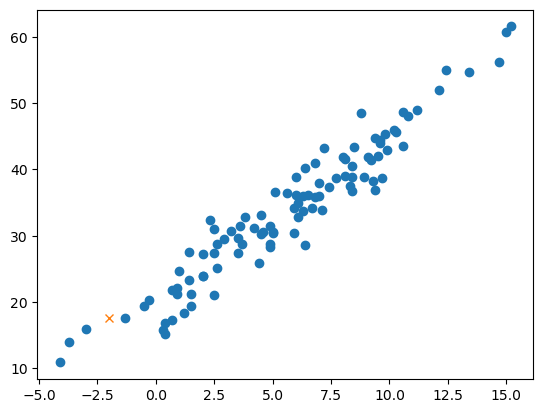

In [10]:
plt.plot(df.temp, df.sales, 'o')
plt.plot([-2.0],[17.67],'x')     # 이미 들어가있는 플롯에 점을 하나 찍는다. 마커는 X

plt.show()

* 예상한 것보다 못팔 것 같은데...?

### **D. 아이디어**

\- 선을 기가 막히게 그어서 추세선을 만들고, 그 추세선 위의 점으로 예측하자.
> (사실 추세선을 알고 있긴 함)

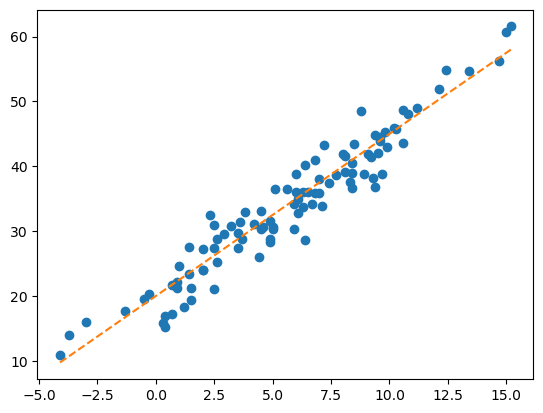

In [11]:
plt.plot(df.temp, df.sales, 'o')
plt.plot(df.temp, 20+df.temp*2.5, '--')  ## 위에서 직접 설정했던 자료의 관계

plt.show()

\- 사실 $y = 20 + 2.5x$라는 추세선을 이미 알고 있었음.

\- 그래서 $x = -2$라면 $y = 20 - 2.5 × 2 = 15$라고 보는 게 합리적임(오차를 고려 안하면)

> 허나, 실제 상황에서 우리는 $20, 2.5$라는 숫자를 모른다.

\- **게임셋팅**
* 원래 게임 : 임의의 $x$에 대하여 합리적인 $y$를 잘 찾는 게임
* 변형된 게임 : $20, 2.5$라는 숫자를 잘 찾는 게임. 즉, 데이처를 보고 최대한 $y_i \approx ax_i+b$가 되도록 $a, b$를 잘 선택하는 게임

## 4. 분석

### **A. 데이터**

\- 변수 설정

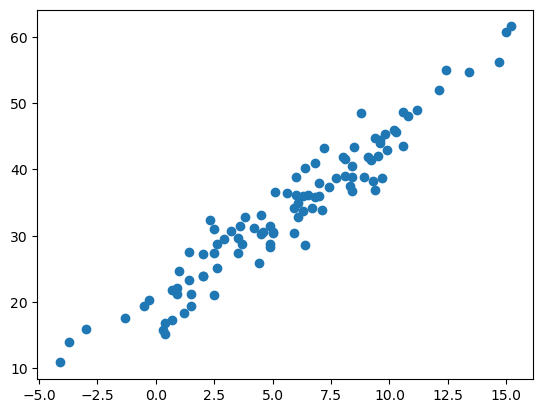

In [12]:
X = df[['temp']] ## 독립변수, 설명변수, 피쳐
y = df[['sales']]  ## 종속변수, 반응변수, 타겟. 실측치니 소문자로 표시

plt.plot(X, y, 'o')
plt.show()

\- 다시 질문 : 기온이 $x = -2.0$일 때 아이스크림을 얼마정도 판다고 보는 게 타당할까?

In [13]:
df[(-3.0 < df.temp) & (-1.0 > df.temp)]

,temp,sales
3,-1.3,17.673681


> 답1 : 대충 17.67 근처이지 않을까?
>
> 답2 : 17.67보다 작지 않을까?
>
> 아이디어 : 추세선을 그리고 거기서 예측해보면 어떨까?

\- 데이터를 학습하여 추세선을 적절히 그릴 수 있고, 그려진 추세선으로 예측까지 해줄 수 있는 아이(predictor)를 만들자.

### **B. Predictor 생성**

In [14]:
predictr = sklearn.linear_model.LinearRegression()  ## 명령어가 겹칠 수 있으니 o를 제거
predictr

LinearRegression()

> 학습을 할 아이를 만들었다.

### **C. 학습(fit, learn)**

In [15]:
predictr.fit(X,y)

LinearRegression()

> 학생을 수련시켰다.

### **D. 예측(predict)**

\- predictr : 데이터를 살펴보니 True는 이럴 것 같아요.

In [16]:
y_hat = predictr.predict(X)  ## X값에 해당하는 y_hat값을 예측하여 산출.

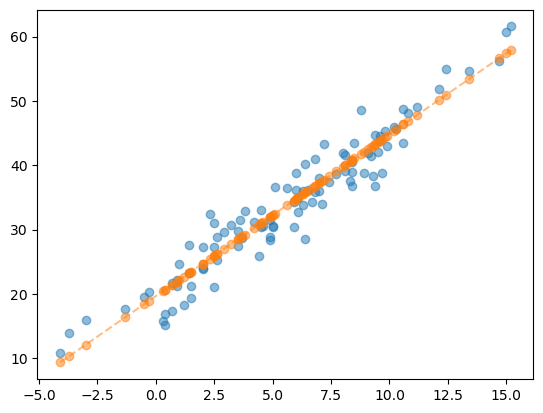

In [17]:
plt.plot(X, y, 'o', alpha = 0.5)
plt.plot(X, y_hat, 'o--', alpha = 0.5)

plt.show()

\- 교수님 : 저런 추세선을 그렸다면, $y = ax + b$꼴의 식에서 $a, b$를 적당한 값으로 찾았다는 의미인데, 그 값은 어디있지?

\- predictr : 아래에 있어요

In [18]:
a = predictr.coef_    ## 상관계수의 약자인듯?
b = predictr.intercept_  ## 절편

(a, b)

(array([[2.51561216]]), array([19.66713127]))

\- 나 : 결과값에 믿음이 안가니 확인해볼게.

\- predictr : ...

In [19]:
(df.temp * float(a) + float(b))[:5]

0     9.353121
1    10.359366
2    12.120295
3    16.396835
4    18.409325
Name: temp, dtype: float64

In [20]:
y_hat[:5]

array([[ 9.35312141],
       [10.35936628],
       [12.12029479],
       [16.39683546],
       [18.40932519]])

* 이와 같이 실제 데이터와 일치하는 것을 볼 수 있다(predictr : 맞다니까...)

\- 새로운 데이터 $x = -2$에 대한 예측(1) - 수식 위주로

In [21]:
float(a*(-2) + b)

14.635906949512638

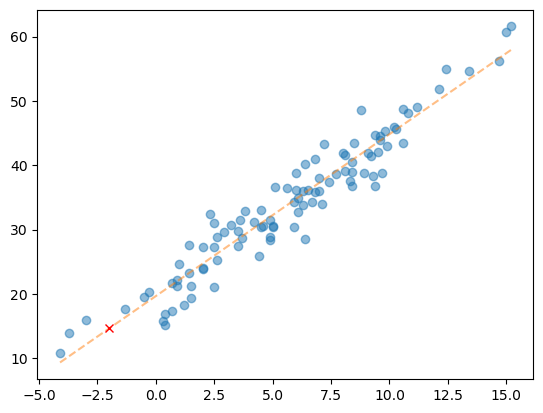

In [22]:
plt.plot(X, y, 'o', alpha = 0.5)
plt.plot(X, y_hat,'--', alpha = 0.5)
plt.plot([-2],[14.635906949512638], 'xr')

plt.show()

>예측값이 직선상에 존재하는 것을 알 수 있다.

\- 새로운 데이터 $x = -2$에 대한 예측(2) - 코드 위주로(★)

In [23]:
Xnew = pd.DataFrame({'temp' : [-2.0]}); Xnew

,temp
0,-2.0


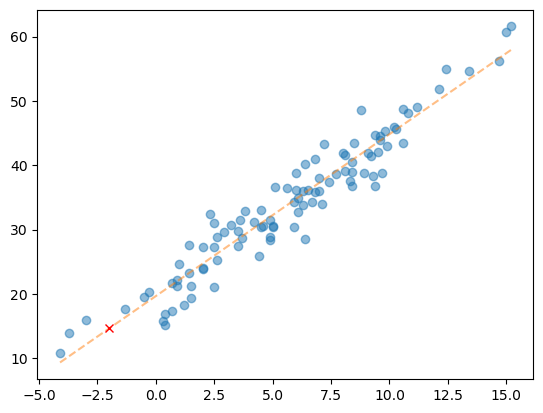

In [24]:
plt.plot(X, y, 'o', alpha = 0.5)
plt.plot(X, y_hat, '--', alpha = 0.5)
plt.plot(Xnew, predictr.predict(Xnew), 'xr')  ## 이미 predictr는 해당 모형에 대해 학습한 이후이므로

plt.show()

# **아이스크림(초코 / 바닐라) 회귀분석**

**이전의 기온 자료를 다시 이용하여 아래와 같은 모형을 가정해보자**

라이브러리 설치

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

## 1. 데이터셋 만들기

In [25]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()   ## 자료를 크기 순서대로 정렬
temp  ## 전주시의 기온 100개 자료

array([-4.1, -3.7, -3. , -1.3, -0.5, -0.3,  0.3,  0.4,  0.4,  0.7,  0.7,
        0.9,  0.9,  1. ,  1.2,  1.4,  1.4,  1.5,  1.5,  2. ,  2. ,  2. ,
        2.3,  2.5,  2.5,  2.5,  2.6,  2.6,  2.9,  3.2,  3.5,  3.5,  3.6,
        3.7,  3.8,  4.2,  4.4,  4.5,  4.5,  4.6,  4.9,  4.9,  4.9,  5. ,
        5. ,  5.1,  5.6,  5.9,  5.9,  6. ,  6. ,  6.1,  6.1,  6.3,  6.3,
        6.4,  6.4,  6.5,  6.7,  6.8,  6.8,  7. ,  7. ,  7.1,  7.2,  7.4,
        7.7,  8. ,  8.1,  8.1,  8.3,  8.4,  8.4,  8.4,  8.5,  8.8,  8.9,
        9.1,  9.2,  9.3,  9.4,  9.4,  9.5,  9.6,  9.6,  9.7,  9.8,  9.9,
       10.2, 10.3, 10.6, 10.6, 10.8, 11.2, 12.1, 12.4, 13.4, 14.7, 15. ,
       15.2])

`-` 아래와 같은 모형을 가정하자.

$$\textup{초코 아이스크림 판매량} = 20 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

$$\textup{바닐라 아이스크림 판매량} = 40 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [26]:
np.random.seed(43052)
choco = 20 + temp * 2.5 + np.random.randn(100)*3
vanilla = 40 + temp * 2.5 + np.random.randn(100)*3

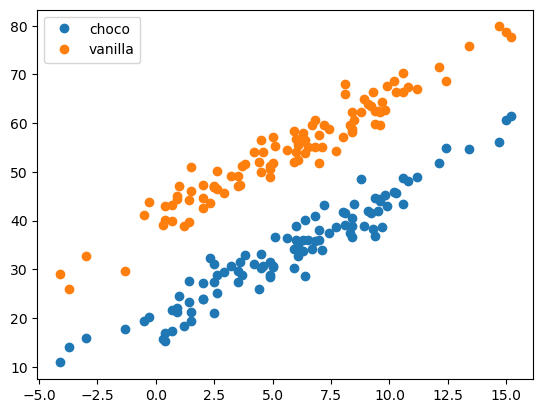

In [27]:
plt.plot(temp, choco, 'o', label = 'choco')
plt.plot(temp, vanilla, 'o', label = 'vanilla')

plt.legend()
plt.show()

\- 주어진 자료 : 우리는 아래를 관측했다고 가정하자.

In [28]:
df1 = pd.DataFrame({'temp' : temp, 'sales' : choco}).assign(type = 'choco')
df2 = pd.DataFrame({'temp' : temp, 'sales' : vanilla}).assign(type = 'vanilla')

df = pd.concat([df1, df2]).reset_index()
df

,index,temp,sales,type
0,0,-4.1,10.900261,choco
1,1,-3.7,14.002524,choco
2,2,-3.0,15.928335,choco
3,3,-1.3,17.673681,choco
4,4,-0.5,19.463362,choco
...,...,...,...,...
195,95,12.4,68.708075,vanilla
196,96,13.4,75.800464,vanilla
197,97,14.7,79.846568,vanilla
198,98,15.0,78.713140,vanilla


## 2. 분석

### **A. 데이터**

In [29]:
X = df[['temp', 'type']]  ## 독립변수, 설명변수, 피쳐
y = df[['sales']] ## 종속변수, 반응변수, 타겟

이대로 넣으면 ```type```에 들어간 데이터가 범주형이기 때문에 인식을 못한다.

In [30]:
X = X.assign(type = (df.type == "choco"))
#X.assign(type = [type == 'choco' for type in X.type])  ## True / False로 이루어진 리스트

In [31]:
X = X.assign(type = (df['type'] == 'choco')*1.0)

### **B. predictor 생성**

In [32]:
predictr = sklearn.linear_model.LinearRegression()
predictr

LinearRegression()

### **C. 학습(fit, learn)**

In [33]:
predictr.fit(X,y)

LinearRegression()

### **D. 예측(predict)**

In [34]:
y_hat = predictr.predict(X)

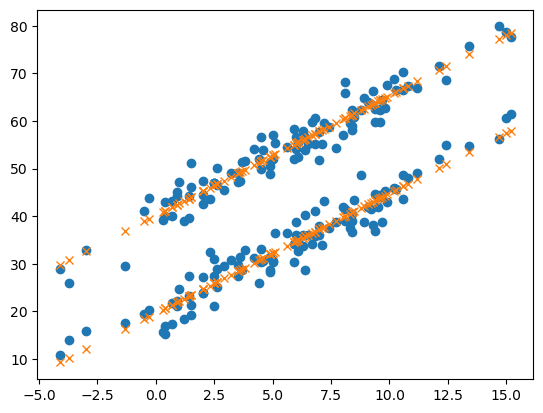

In [41]:
plt.plot(df.temp, df.sales, 'o')
plt.plot(df.temp, predictr.predict(X), 'x')

plt.show()

> 뜻도없이 초코 바닐라에 (1,0)을 넣었는데, 어떻게 뭐가 나오긴 했다.

**어케함???**

$$\textup{아이스크림 판매량} = 40 + \textup{아이스크림종류} \times (-20) + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [43]:
predictr.coef_, predictr.intercept_

(array([[  2.52239574, -20.54021854]]), array([40.16877158]))

범주형 자료인 아이스크림 종류에 따라 -20.54를 곱한 수를 더하여 수식을 설명하였다.

\- 온도가 -2이고, ```type```이 ``vanilla```라면? 예측값은?

In [46]:
Xnew = pd.DataFrame({'temp' : [-2.0], 'type' : [0]})
Xnew

,temp,type
0,-2.0,0


학습한 모델에 적용하여 예측

In [47]:
predictr.predict(Xnew)

array([[35.1239801]])

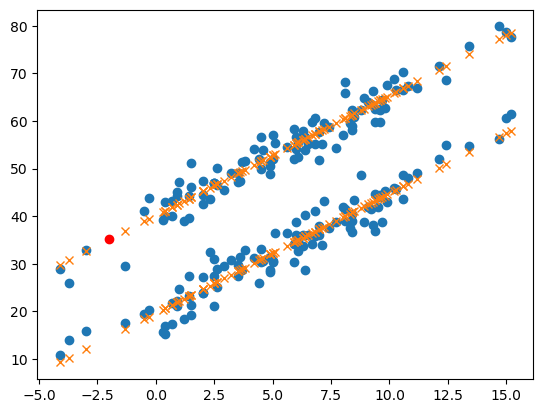

In [49]:
plt.plot(df.temp, df.sales, 'o')
plt.plot(df.temp, y_hat, 'x')
plt.plot(Xnew.temp, predictr.predict(Xnew), 'ro')

plt.show()

> 온도가 -2일 때 바닐라맛 아이스크림의 판매 정도를 예측하였다.

## 3. 데이터를 전처리하는 다른 방법

\- 데이터

In [50]:
X = df[['temp','type']] # 독립변수, 설명변수, 피쳐
y = df[['sales']] # 종속변수, 반응변수, 타겟 

 * 원-핫 인코딩

In [52]:
X = pd.get_dummies(X) ## 일단 다 숫자다...(0,1) 더미를 만드는 방식이다.
X

,temp,type_choco,type_vanilla
0,-4.1,True,False
1,-3.7,True,False
2,-3.0,True,False
3,-1.3,True,False
4,-0.5,True,False
...,...,...,...
195,12.4,False,True
196,13.4,False,True
197,14.7,False,True
198,15.0,False,True


> 장점 : 구분할 범주형 변수가 많아질 때 용이하다. 바닐라 / 초코 / 딸기일 때 0/1/2로 분류하기는 어려우니까...

이후 과정은 동일

In [53]:
predictr = sklearn.linear_model.LinearRegression()
predictr.fit(X,y)
y_hat = predictr.predict(X)

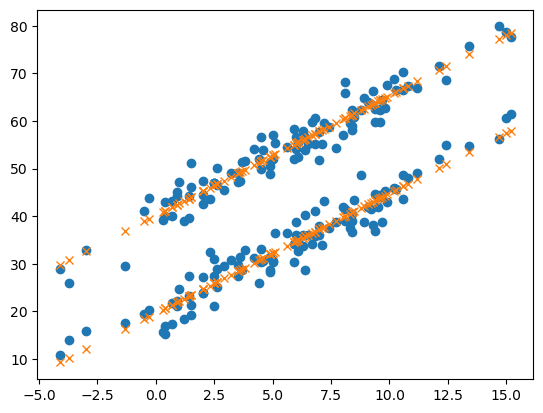

In [55]:
plt.plot(df.temp, df.sales, 'o')
plt.plot(X.temp, y_hat, 'x')

plt.show()

진짜 어떻게 한 걸까?

\- 컴퓨터가 모형을 어떻게 바라본 걸까?

In [56]:
predictr.coef_, predictr.intercept_

(array([[  2.52239574, -10.27010927,  10.27010927]]), array([29.89866231]))

> 초코와 바닐라에 적용되는 들어가있는 coef_가 각기 설정되어 있다. 초코일 때 -10.27을 빼주고, 바닐라일 때 10.27을 더해주는 식으로...
>
> $$\textup{아이스크림 판매량} = 30 + \textup{초코} \times (-10) + \textup{바닐라} \times 10 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

## 4. 모형을 평가하는 방법

* $r^2$ : 결정계수의 크기를 내준다.

In [57]:
predictr.score(X, y)

0.9628857449454437

> 상당히 높은 숫자, 모형이 아주 좋다고 평가된다.